# Tutorial 5 - Performance Metrics

**Course:** SYSC 4906 - Introduction to Machine Learning

**Semester:** Fall 2020

**Adapted by:** [Kevin Dick](https://kevindick.ai/)

**Some Code Adapted From:** [Plotly Documentation](https://plotly.com/python/roc-and-pr-curves/)

---

**NEW!** Introducing the [Plotly](https://plotly.com/) Graphing and Visualization Library! **NEW!**

For additional reading and tutorials on getting started, see this example: [Plotly Beautiful Data Visualization Made Easy](https://medium.com/swlh/plotly-beautiful-data-visualization-made-easy-3f7e48864706)

In this notebook we will:
1. define several performance metrics
2. generate data and fit a classification model
3. visualize various performance curves & metrics

## 1. Defining Several Performance Metrics

### True Positive, True Negative, False Positive, False Negative: TP, TN, FP, FN
* A **true positive** is an outcome where the model *correctly* predicts the *positive class*.
* A **true negative** is an outcome where the model *correctly* predicts the *negative class*.
* A **false positive** is an outcome where the model *incorrectly* predicts the *positive class*.
* A **false negative** is an outcome where the model *incorrectly* predicts the *negative class*.

### The Confusion Matrix

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabeling one as another).

### Accuracy (Acc.)
**Accuracy** is used as a statistical measure of how well a binary classification test correctly identifies or excludes a condition. That is, the accuracy is the proportion of correct predictions (both true positives and true negatives) among the total number of cases examined

### Sensitivity & Specificity (Sn. & Sp.)
**Sensitivity** measures the proportion of positives that are correctly identified (e.g., the percentage of sick people who are correctly identified as having some illness).

**Specificity** measures the proportion of negatives that are correctly identified (e.g., the percentage of healthy people who are correctly identified as not having some illness).

### Precision (Pr.)
**Precision** is the fraction of retrieved elements that are relevant to the query.

### Reciever Operating Chaaracteristic (ROC)
**Requires:** Classifer must return a probability/confidence score of a prediction.
ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes.

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection in machine learning. The false-positive rate is also known as probability of false alarm and can be calculated as (1 − specificity). It can also be thought of as a plot of the power as a function of the Type I Error of the decision rule (when the performance is calculated from just a sample of the population, it can be thought of as estimators of these quantities). The ROC curve is thus the sensitivity or recall as a function of fall-out. In general, if the probability distributions for both detection and false alarm are known, the ROC curve can be generated by plotting the cumulative distribution function (area under the probability distribution from ${\displaystyle -\infty }-\infty$  to the discrimination threshold) of the detection probability in the y-axis versus the cumulative distribution function of the false-alarm probability on the x-axis.

In [1]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/google/colab/data_table.py:30: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



## 2. Generate Data and Fit a Classification Model

In [2]:
# Generate 500 samples with 20 features
X, y = make_classification(n_samples=500, random_state=42)
print(f'Shape of our dataset:{X.shape}')

Shape of our dataset:(500, 20)


In [3]:
# Train a logistic regression model (continuous scores) or Decision Tree (discrete scores)
model = LogisticRegression()
#model = DecisionTreeClassifier(max_depth=1) # Varying tree depth allows for more complex models
model.fit(X, y)

# For each sample, predict the class
y_score = model.predict_proba(X)[:, 1]

# Obtain the False Positive Rate, the True Positive Rate, and the Thresholds
fpr, tpr, thresholds = roc_curve(y, y_score)


## 3. Visualize Various Performance Curves & Metrics

Confusion matrix, without normalization
[[225  26]
 [ 27 222]]
Normalized confusion matrix
[[0.89641434 0.10358566]
 [0.10843373 0.89156627]]


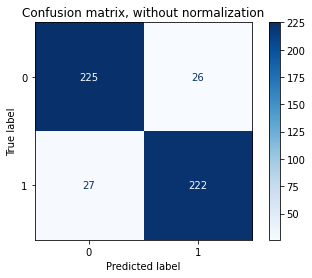

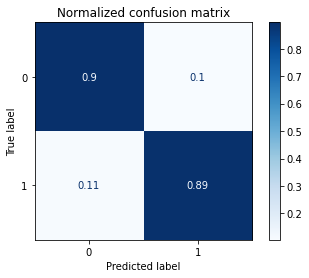

In [4]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X, y,
                                 display_labels=['0','1'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [5]:
# The histogram of scores compared to true labels
fig_hist = px.histogram(
    x=y_score, color=y, nbins=50,
    labels=dict(color='True Labels', x='Predicted Score')
)
fig_hist.show()

In [6]:
# Evaluating model performance at various thresholds
df = pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr
}, index=thresholds)
df.index.name = "Thresholds"
df.columns.name = "Rate"
print(df.head())
print(df.tail())

fig_thresh = px.line(
    df, title='TPR and FPR at every threshold',
    width=700, height=500
)
fig_thresh.add_trace(go.Scatter(x=thresholds, y=tpr, name='True Positive Rate', mode='lines'))
fig_thresh.add_trace(go.Scatter(x=thresholds, y=fpr, name='False Positive Rate', mode='lines'))

fig_thresh.update_yaxes(scaleanchor="x", scaleratio=1)
fig_thresh.update_xaxes(range=[0, 1], constrain='domain')
fig_thresh.show()

Rate        False Positive Rate  True Positive Rate
Thresholds                                         
1.999579               0.000000            0.000000
0.999579               0.000000            0.004016
0.992795               0.000000            0.168675
0.991963               0.003984            0.168675
0.969968               0.003984            0.373494
Rate        False Positive Rate  True Positive Rate
Thresholds                                         
0.029529               0.641434            0.991968
0.028190               0.641434            0.995984
0.006220               0.860558            0.995984
0.006123               0.860558            1.000000
0.000026               1.000000            1.000000


In [8]:
# Plot the ROC Curve
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [7]:
precision, recall, thresholds = precision_recall_curve(y, y_score)

# The PR baseline is the number of positive samples over the total number of samples
# The rare the positive class, the worse the overall performance...
baseline = sum(y)/len(y) # Assumes: class 0 and class 1

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=baseline, y1=baseline
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()

![title](measure-all-the-things.png)

## Computing Metrics in a Nutshell

For every possible metric, there is a function out there that will calculate it for you.

The **CRITICAL** part is that you understand what the metric means and how to interpret it.

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

X, y = make_classification(n_samples=500, random_state=42)
y_pred = model.predict(X)

metric_zoo = [accuracy_score, precision_score, 
              recall_score, f1_score, 
              cohen_kappa_score, roc_auc_score, 
              confusion_matrix]

for metric in metric_zoo:
    value = metric(y, y_pred)
    print(f'The {metric.__name__} is: {value}')

The accuracy_score is: 0.894
The precision_score is: 0.8951612903225806
The recall_score is: 0.891566265060241
The f1_score is: 0.8933601609657947
The cohen_kappa_score is: 0.787993215782905
The roc_auc_score is: 0.8939903038448614
The confusion_matrix is: [[225  26]
 [ 27 222]]


### Questions

**Q:** What does it mean when your model accuracy equals the proportion of the majority class?

**Q:** Is a model with AUROC > 0.50 useless?

**Q:** Is a model with AUROC >> 0.50 useless?

---

## Takeaway Messages

* **Metrics can be misleading**. One metric might appear impressive, however a more appropriate metric might reveal that your model is useless for the target task.
* Problems with moderate to extreme class imbalance will typically favour model evaluation via the precision-recall curve.
* In addition to comparing performance between models, it is useful to also compare model preformance to random performance.


* **True Positive (TP)**: "The correct retrieval of a true condition."
* **False Positive (FP)**: "A false positive is an error in binary classification in which a test result incorrectly indicates the presence of a condition (such as a disease) when the condition is not present." ([Type I Error](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors))
* **True Negative (TN)**: "The correct rejection of an absent condition".
* **False Negative (FN)**: "A false negative is the opposite error where the test result incorrectly fails to indicate the presence of a condition when it is present." ([Type II Error](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors))
* **Confusion Matrix**: "The confusion matrix (a.k.a. error matrix) is a specific table layout that allows visualization of the performance of an algorithm. The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabeling one as another)."
* **Normalized Confusion Matrix**: A normalized variant of the traditional confusion matrix.
* **Accuracy (Acc.)**: Used as a statistical measure of how well a binary classification test correctly identifies or excludes a condition. Measure the proportion of correct samples over all samples.
* **Sensitivity(Sn.)**: measures the proportion of positives that are correctly identified.
* **Specificity(Sp.)**: measures the proportion of negatives that are correctly identified.
* **Precision(Pr.)**: the fraction of retrieved elements that are relevant to the query.
* **ROC**: a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.
* **AUC**: equal to the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one (assuming 'positive' ranks higher than 'negative').
* **F1**: the harmonic mean of the precision and recall.

NOTE: Many definitions borrowed from Wikipedia! 
(Consider donating to keep information open and free!!)

---

$\blacksquare$